# Titanic上，究竟谁的生还几率高？？？---》titanic数据分析报告

## 1.导入模块及数据

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
titanic_rawdata = pd.read_csv('D:/dataanalysis/udacity/P2/project/titanic_data.csv')

## 2.初步统计分析

### 2.1 数据集中包含哪些信息？数据集中有12个字段，主要是乘客信息以及是否生还的统计，其中Survived == 1表示生还，而Survived == 0表示死亡

In [52]:
titanic_rawdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.2 数据中攒在异常值吗？通过对各字段的空值统计，发现Age(年龄)列存在177个，Cabin(座位号)列空值数高达存在687个，Embarked（登舱码头）列2个，其他列无缺失值

In [53]:
# 缺失项统计
print(titanic_rawdata.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### 2.3 乘客总人数多少？获救人数多少？乘客的平均年龄多少？等等一系列基本问题等着我们。通过初步的描述性统计可知：（1）乘客总人数891人（2）生化率仅38.4%，大部分的人没有获救，下述柱形图也可以明确看出 （3）平均年龄在29.7岁，可知乘客大部分都是年轻人

In [54]:
titanic_rawdata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


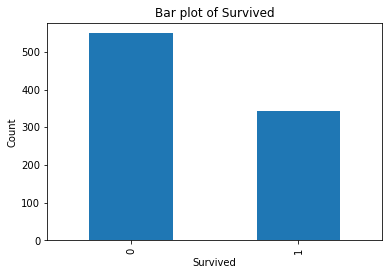

In [55]:
titanic_rawdata['Survived'].value_counts().plot(kind='bar')

plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Bar plot of Survived')
plt.show()

## 3.乘客是否生还到底与哪些因素相关？（生还率因子分析）

### 3.1 女性获救机会大还是男性获救机会大？（1）从乘客中的男女总人数来看，大部分乘客为男性。（2）进一步分析发现，女士生获救的几率（74.2%）远高于男士（18.9%）

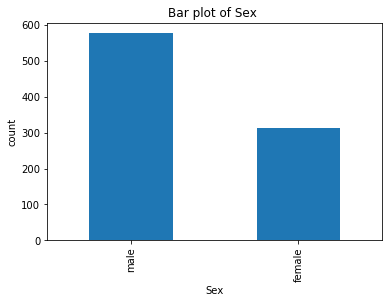

In [56]:
# 数据处理
rawdata_by_sex = titanic_rawdata[['PassengerId','Survived','Sex']]

# 了解乘客中的男女比例
rawdata_by_sex['Sex'].value_counts().plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('count')
plt.title('Bar plot of Sex ')
plt.show()


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


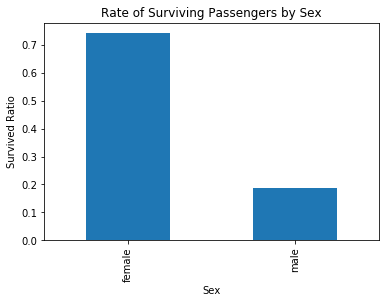

In [57]:
# 定义作图函数
def plotRate(feature):
    survived_rate = (titanic_rawdata.groupby([feature]).mean())['Survived']
    survived_rate.plot(kind='bar')
    plt.title('Rate of Surviving Passengers by {}'.format(feature.name))
    plt.ylabel('Survived Ratio')

# call the function to make plot
plotRate(titanic_rawdata['Sex'])
survived_rate = (titanic_rawdata.groupby('Sex').mean())['Survived']
print survived_rate

### 3.2 乘客的生还几率与年龄是否相关呢？   （1）所有乘客年龄分布情况如下曲线所示，乘客的年龄大体上是呈现正态分布形式，平均年龄在30岁左右 （2）通过不同年龄段的生还比例的分析，小孩的生还比例最高，高达70.2%，中年人、青年人以及少年生还比例相差不大，而老人的生还比例最低

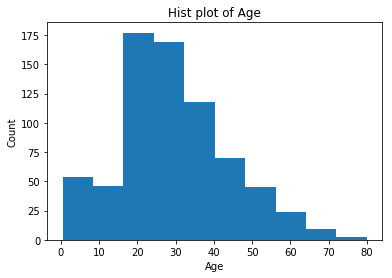

In [58]:
# 数据处理：删除缺失值--》上述统计中有177位乘客年龄数据缺失
rawdata_by_age = titanic_rawdata[['PassengerId','Survived','Age']] 
data_by_age_delete_none = rawdata_by_age.dropna()
# 乘客年龄分布曲线
data_by_age_delete_none['Age'].plot(kind = 'hist')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Hist plot of Age')
plt.show()

E:\Users\cocoliz\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Age
Children    0.702128
Junior      0.387097
Middle      0.397906
Old         0.269231
Youth       0.386635
Name: Survived, dtype: float64


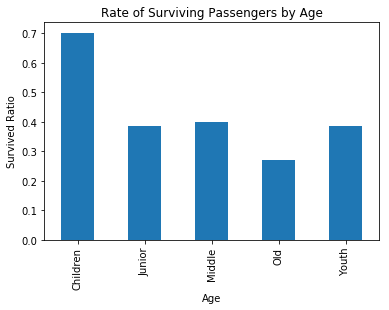

In [59]:
# 年龄分组
def group_age(age):
    if age >= 60:
      return 'Old'
    elif age >= 36 and age < 60:
      return 'Middle'
    elif age >= 15 and age <36:
      return 'Youth'
    elif age >= 7 and age <15:
      return 'Junior'
    else:
      return 'Children'
  
data_by_age_delete_none['Age'] = data_by_age_delete_none['Age'].apply(group_age)
plotRate(data_by_age_delete_none['Age'])
survived_rate = (data_by_age_delete_none.groupby('Age').mean())['Survived']
print survived_rate

### 3.3 花高价购票的乘客生还几率也是否会高呢？ （1）票价总体分布情况：大部分的人的票价在0-100之间，大于200的人数很少  （2）票价与生还机会相关性分析，如下箱线图所示，幸存者的船票票价均值高于受害乘客

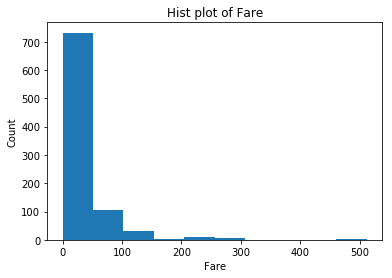

In [60]:
# 数据处理
rawdata_by_fare = titanic_rawdata[['PassengerId','Survived','Fare']]

# 票价的分布情况
rawdata_by_fare['Fare'].plot(kind = 'hist')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Hist plot of Fare')
plt.show()

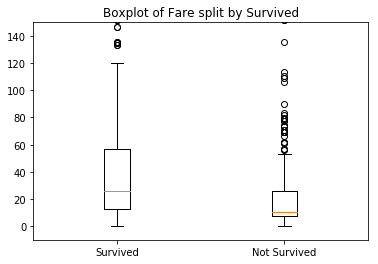

In [61]:
#  分析获救者与受害者的船票票价统计差异
fig,ay = plt.subplots()
Fare1 = rawdata_by_fare.Fare[rawdata_by_fare.Survived == 1]
Fare0 = rawdata_by_fare.Fare[rawdata_by_fare.Survived == 0]
plt.boxplot((Fare1,Fare0),labels=('Survived','Not Survived'))
ay.set_ylim([-10,150])
ay.set_title('Boxplot of Fare split by Survived')
plt.show()

### 3.4 船舱等级是否也能预测乘客的生还几率呢？    （1）乘客的船舱等级分布：第三等级的乘客比例超过50%，而第二、第三等级比例相差不大 （2）随着船舱等级数越高，乘客获救概率越大，其中第一等级的乘客的获救比例甚至大于第三等级乘客的两倍，故船舱等级也与乘客的生还率有相关性

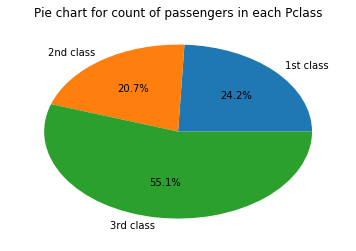

In [62]:
#乘客船舱等级分布情况
by_Pclass = titanic_rawdata.groupby('Pclass').size()
plt.pie(by_Pclass, labels = ['1st class','2nd class','3rd class'], autopct='%.1f%%')
plt.title("Pie chart for count of passengers in each Pclass")
plt.show()

                 PassengerId     ratio
Survived Pclass                       
0        1                80  0.370370
         2                97  0.527174
         3               372  0.757637
1        1               136  0.629630
         2                87  0.472826
         3               119  0.242363


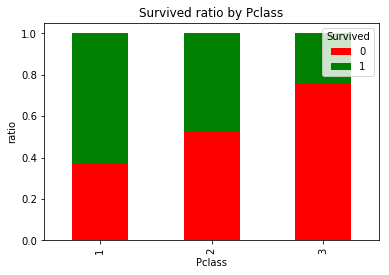

In [63]:
# 针对船舱等级和是否生还分组，以PassengerID做统计计数
data_by_Pclass = rawdata_by_Pclass.groupby(['Survived','Pclass']).count()
# 计算分组后的比例列
data_by_Pclass['ratio'] = data_by_Pclass['PassengerId'] / data_by_Pclass.groupby('Pclass')['PassengerId'].sum()
print data_by_Pclass
# 转化表
survived_ratio_by_Pclass = data_by_Pclass.pivot_table(values ='ratio', index='Pclass',columns='Survived',aggfunc = 'mean')
#作图
survived_ratio_by_Pclass.plot(kind='bar',color = 'rg',stacked = True)
plt.xlabel('Pclass')
plt.ylabel('ratio')
plt.title('Survived ratio by Pclass')
plt.show()

### 3.5 有亲人一起同船的乘客生还几率是否更高呢？  总体分布来看，乘客大多数是一个人在船上。但是同行如果有1个或2个直系亲属或是其他亲戚朋友，乘客的生还几率相对较高，由此可知游船乘客是否独行与其最终是否获救也有一定相关性

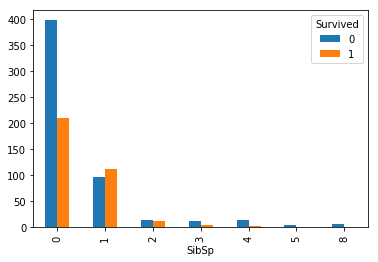

In [64]:
pd.crosstab(titanic_rawdata['SibSp'],titanic_rawdata['Survived']).plot(kind='bar')
plt.show()

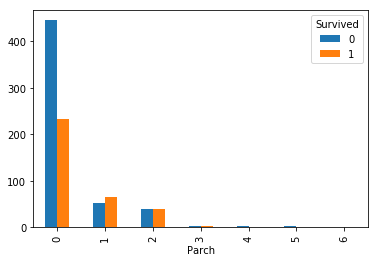

In [65]:
pd.crosstab(titanic_rawdata['Parch'],titanic_rawdata['Survived']).plot(kind='bar')
plt.show()

# 结论：1.报告中使用的数据并不是乘客总体数据，但这个样本量可以用来进行各因素的相关性分析。  2.报告空中对待年龄的缺失值，采取了去除处理。因为去掉后的乘客年龄分布仍大体符合正态分布，故该法是具有合理性的。3.以上分析的各因子与生还率的都具有一定的相关性，具体可见报告中各项具体分析。但除了数据集中变量会影响到乘客的生还率外，还有其他变量影响，例如：是否会游泳？职业？等。4.报告中的分析均属于探索性分析，只能得出相关性结论而非因果关系。